## **0.1 About Dataset**

The dataset provides a comprehensive view of the air quality landscape in Hyderabad City. It includes 72 rows and 11 columns, containing data on various pollutant parameters such as PM10,
SO2, NOx, PM2.5, Ammonia, O3, CO, Benzene, and the AQI. The dataset, derived from trusted
government sources, offers researchers and data scientists an invaluable resource to analyze air
quality patterns and trends. With historical data spanning different months, it enables the obser-
vation of seasonal variations and potential correlations between pollutant levels, fostering a deeper
understanding of the city’s air quality dynamics. By leveraging this dataset, stakeholders can make
informed decisions, implement targeted pollution reduction strategies, and contribute to a greener
future in Hyderabad City.

In [30]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [31]:
# import dataset
data = pd.read_csv("/content/drive/MyDrive/Study/AI ML/Air Quality Analysis/AQI Data Set.csv")

In [32]:
data.head()

,Id,Mounths,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,1,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,2,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0
2,3,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0
3,4,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0
4,5,May-17,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN


## **0.2 Data Transformation**

In [33]:
# Remove Id column
data = data.drop("Id", axis = 1)

In [34]:
# Change name of the columns
data.columns = ['months', 'pm10', 'so2', 'nox', 'pm25', 'ammonia', 'o3', 'co','benzene', 'AQI']

In [35]:
data.head()

,months,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI
0,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0
2,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0
3,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0
4,May-17,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN


In [36]:
# separate month & year
data[['month', 'year']] = data['months'].str.split("-", expand=True)

In [37]:
data.head()

,months,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI,month,year
0,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0,Jan,17
1,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0,Feb,17
2,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0,Mar,17
3,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0,Apr,17
4,May-17,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN,May,17


In [38]:
# Replace month names to their corresponding month numbers
month = {'Jan': "1", 'Feb':"2", 'Mar': "3", 'Apr': "4",
         'May': "5", 'Jun':"6", 'Jul': "7", 'Aug': "8",
         'Sep': "9", 'Oct':"10", 'Nov':"11", 'Dec':"12"}

data['month'] = data['month'].map(month)

In [39]:
data['year'] = 2000 + data['year'].astype('int')
data['month'] = data['month'].astype('int')

In [40]:
new_data = data[['month', 'year', 'pm10', 'so2', 'nox', 'pm25',
                 'ammonia','o3', 'co', 'benzene', 'AQI']].copy()

In [41]:
new_data.head()

,month,year,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI
0,1,2017,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,2,2017,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0
2,3,2017,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0
3,4,2017,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0
4,5,2017,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN


## **0.3 Handling Missing Values**

<Axes: >

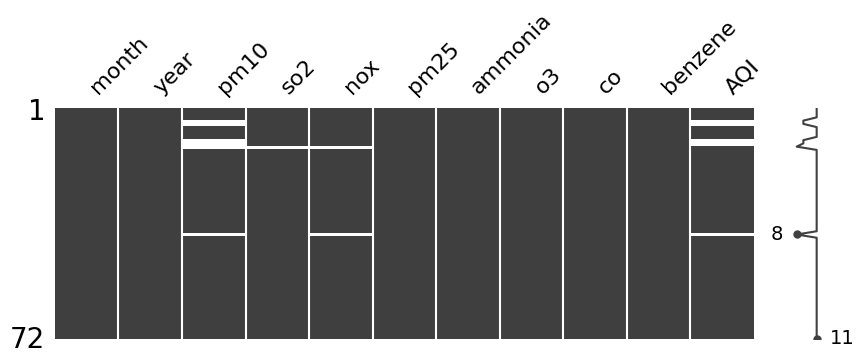

In [42]:
msno.matrix(new_data, figsize=(10, 3))

The missing values are filled using KNNImputer, which calculates the average of neighboring values and effectively preserves data trends.

In [43]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=np.nan, n_neighbors=2)
clean_data = pd.DataFrame(imputer.fit_transform(new_data),
                          columns = ['month', 'year', 'pm10', 'so2',
                                     'nox', 'pm25', 'ammonia', 'o3',
                                     'co', 'benzene', 'AQI'])

<Axes: >

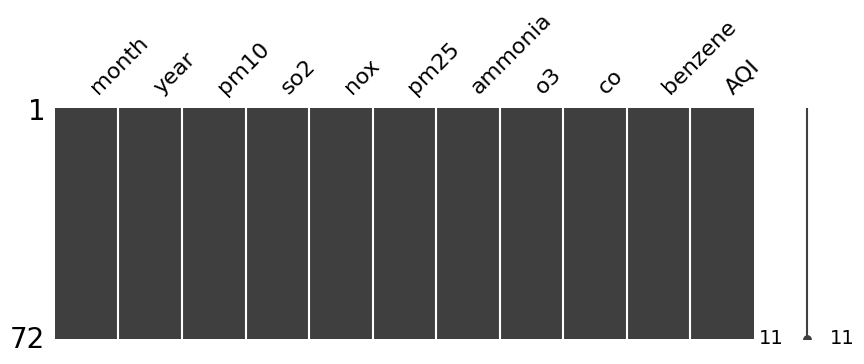

In [44]:
msno.matrix(clean_data, figsize=(10, 3))

In [45]:
clean_data.head()

,month,year,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI
0,1.0,2017.0,174.0,26.4,35.0,79.0,25.0,107.6,0.9,0.7,149.0
1,2.0,2017.0,143.0,35.1,40.3,75.0,31.0,103.0,0.9,0.9,129.0
2,3.0,2017.0,142.0,32.1,30.9,59.0,26.0,80.7,0.8,0.5,128.0
3,4.0,2017.0,117.0,50.9,36.3,75.0,36.0,79.5,0.9,0.7,111.0
4,5.0,2017.0,144.0,41.6,25.2,53.0,28.0,70.0,0.5,0.5,129.0


In [46]:
clean_data['month'] = clean_data['month'].astype("int")
clean_data['year'] = clean_data['year'].astype("int")

In [47]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    72 non-null     int64  
 1   year     72 non-null     int64  
 2   pm10     72 non-null     float64
 3   so2      72 non-null     float64
 4   nox      72 non-null     float64
 5   pm25     72 non-null     float64
 6   ammonia  72 non-null     float64
 7   o3       72 non-null     float64
 8   co       72 non-null     float64
 9   benzene  72 non-null     float64
 10  AQI      72 non-null     float64
dtypes: float64(9), int64(2)
memory usage: 6.3 KB


## **0.4 Exploratory Data Analysis**

In [48]:
numeric_features = ['pm10', 'so2', 'nox', 'pm25', 'ammonia',
                    'o3', 'co', 'benzene', 'AQI']

categorical_features = ['month', 'year']

In [49]:
clean_data[numeric_features].describe()

,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.00000,72.000000
mean,110.916667,16.799306,30.235417,46.722222,23.997222,27.790278,0.549722,0.22500,106.213889
std,25.184111,9.796092,4.110279,20.224251,5.824450,22.585906,0.238764,0.19307,22.319410
min,76.000000,4.000000,18.400000,12.000000,11.000000,2.400000,0.200000,0.00000,58.000000
25%,90.750000,9.950000,28.075000,27.000000,20.000000,12.475000,0.400000,0.10000,92.000000
50%,104.500000,14.100000,29.750000,47.000000,23.000000,20.750000,0.500000,0.20000,103.750000
75%,129.250000,20.225000,32.675000,63.000000,28.000000,35.550000,0.647500,0.30000,120.175000
max,178.000000,50.900000,40.300000,87.000000,37.000000,107.600000,1.520000,0.90000,166.000000


In [51]:
# show distribution function displays a histogram and boxplot for continuous numeric values
def show_distribution(var):
    fig, ax = plt.subplots(2,1, figsize=(8,8))
    sns.histplot(clean_data, x = var, color = 'red', alpha = 0.2,
                 kde = True, bins = 15, ax = ax[0])
    ax[0].set_ylabel("Frequency")
    ax[0].axvline(x = clean_data[var].mean(), color = 'yellow',
                  ls = "--", lw = 2, )
    ax[0].axvline(x = clean_data[var].median(), color = 'cyan',
                  ls = "--", lw = 2)
    sns.boxplot(clean_data, x = var, ax = ax[1])
    ax[1].set_xlabel(var)
    fig.show()

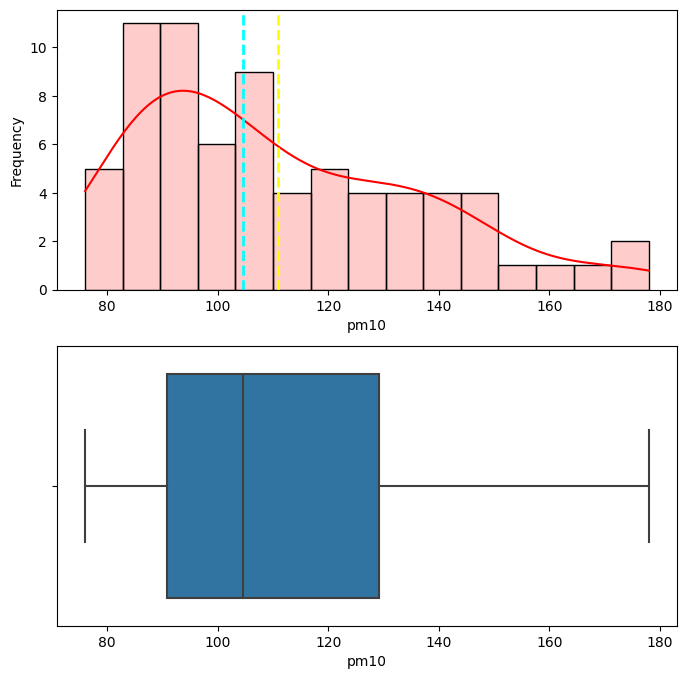

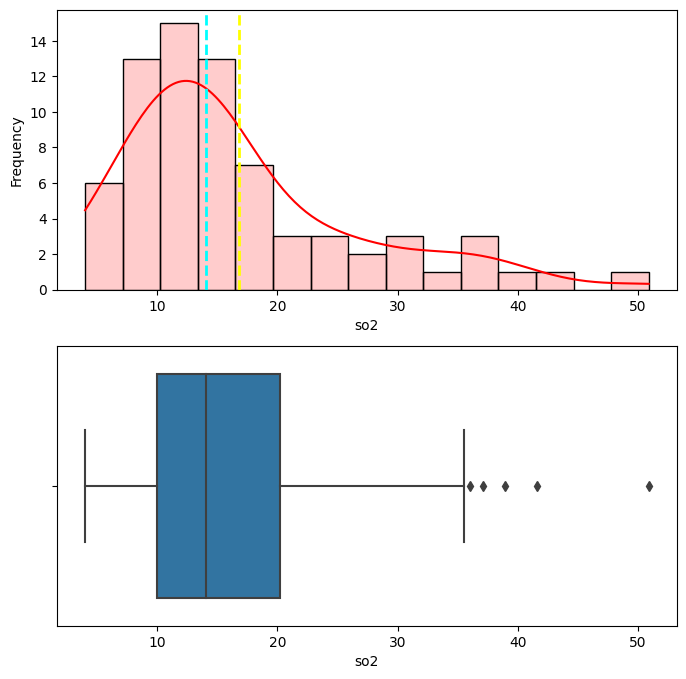

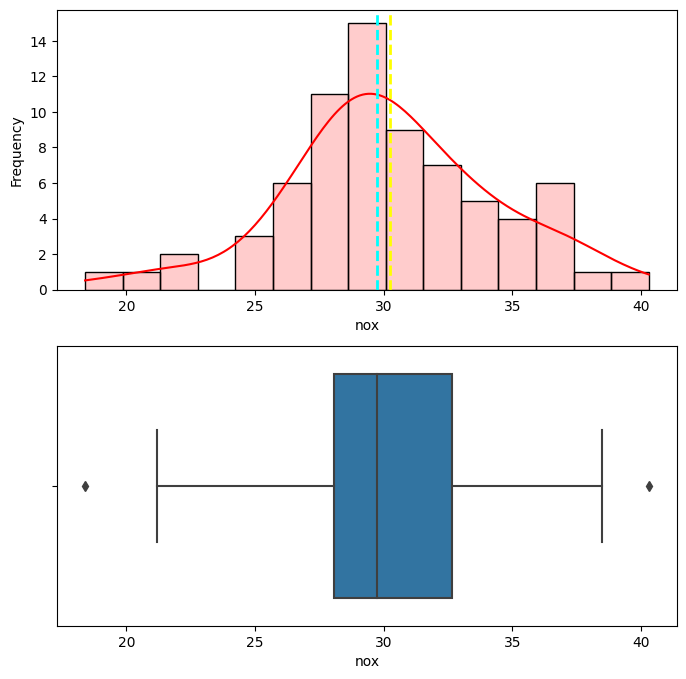

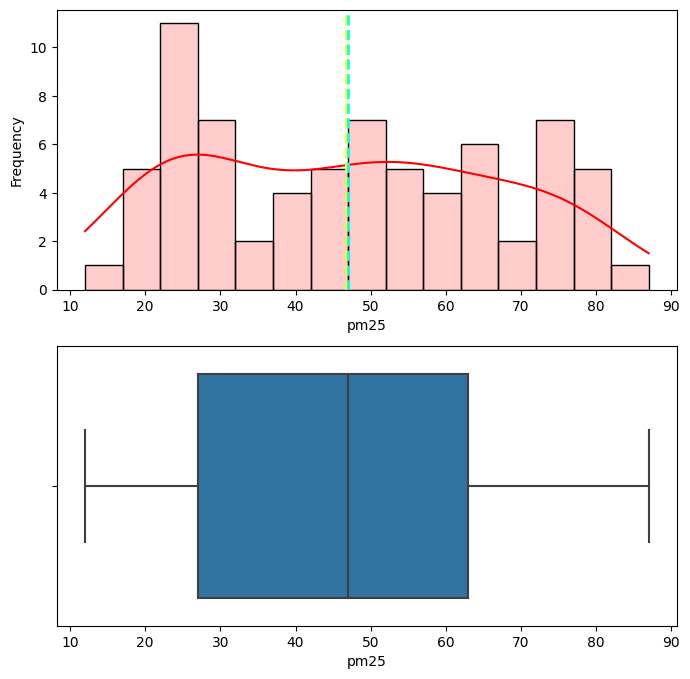

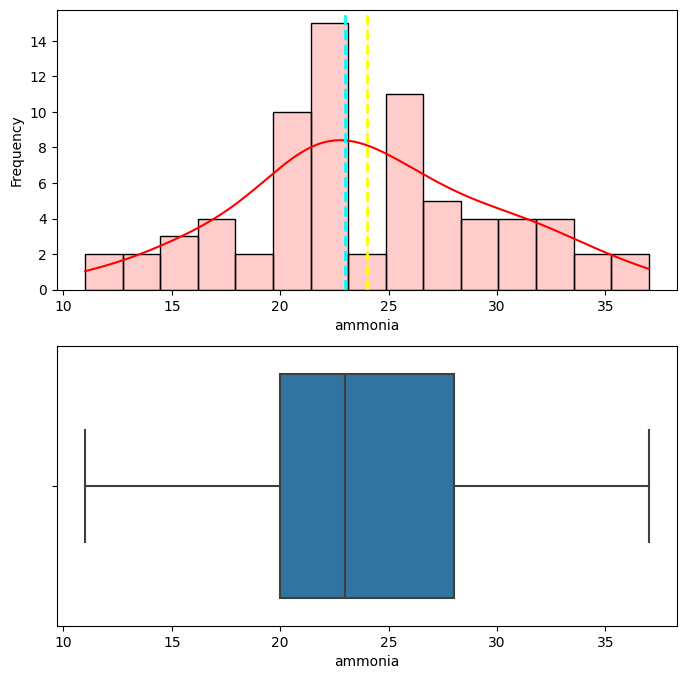

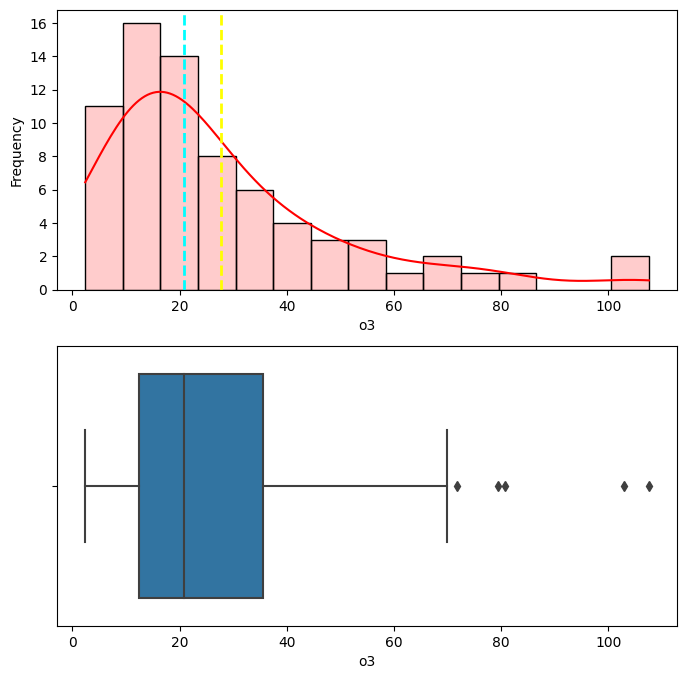

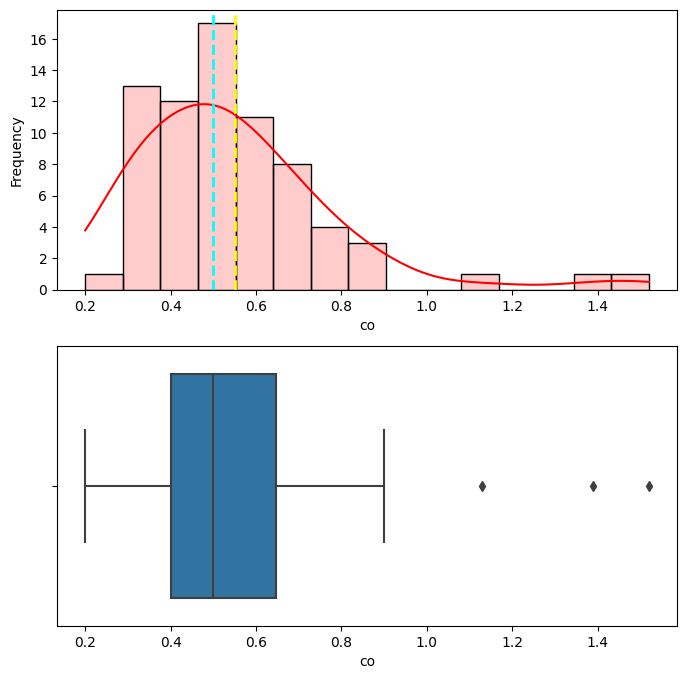

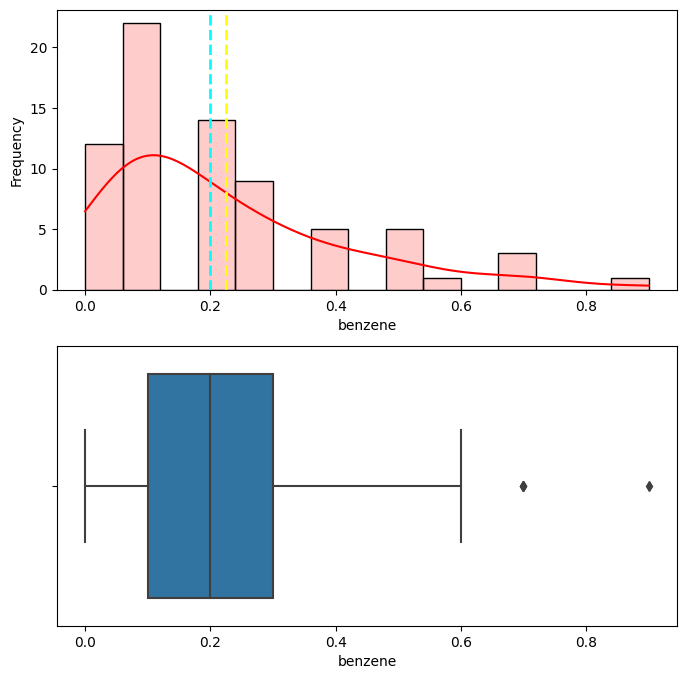

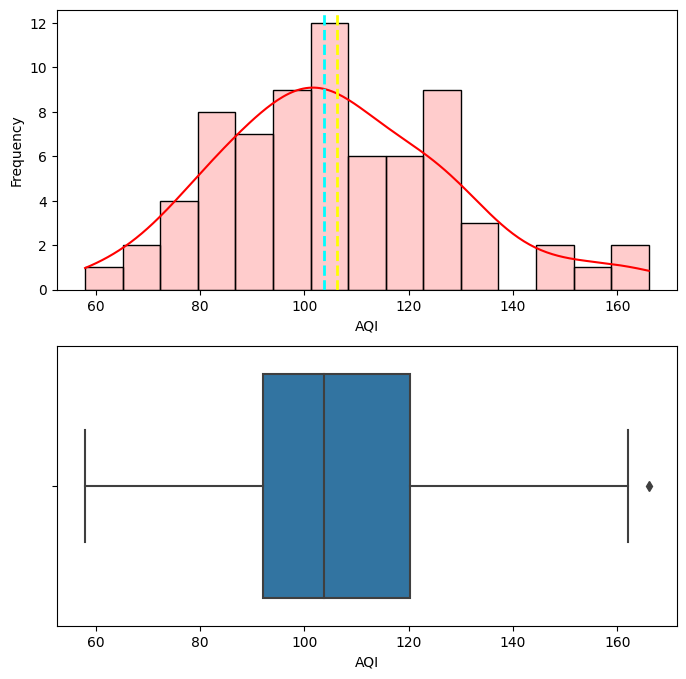

In [53]:
# Numerical features analysis
for col in numeric_features:
    show_distribution(col)

### **Insights**

|Parameter|Mean|Median|Current Value (Dec 2022)|
|---|---|---|---|
|PM 10 (ffg/m3) |110.9 |104.5 |88|
|SO2 (ffg/m3) |16.8 |14.1 |13|
|NOx (ffg/m3) |30.2 |29.8 |34.5|
|PM 2.5 (ffg/m3) |46.7 |47 |72|
|Ammonia (ffg/m3) |24 |23 |15|
|O3 (ffg/m3) |27.8 |20.75 |16.5|
|CO (mg/m3) |0.5497 |0.5 |1.39|
|Benzene (ffg/m3) |0.225 |0.2 |0.04|
|AQI |106.2 |103.8 |162|

**PM 10:** The current value of 88 ffg/m3 indicates relatively better air quality compared to the mean (110.9) and median (104.5) values. However, it still exceeds the WHO’s guideline of 50 ffg/m3 for 24-hour exposure, **suggesting potential health risks**.

**SO2:** The current value of 13 ffg/m3 suggests relatively lower concentrations of SO2 compared to the mean (16.8) and median (14.1) values, indicating better air quality within acceptable limits.
NOx: The current value of 34.5 ffg/m3 is higher than the mean (30.2) and media (29.8), indicating relatively higher NOx levels and **potentially poorer air quality**.

**PM 2.5:** The current value of 72 ffg/m3 exceeds both the mean (46.7) and median (47), indicating worse air quality with elevated levels of PM 2.5, **exceeding the WHO’s guideline of 25 fig/m3** for 24-hour exposure.

**Ammonia:** The current value of 15 ffg/m3 suggests relatively lower concentrations compared to the mean (24) and median (23), but without specific threshold limits, a comprehensive evaluation of air quality related to ammonia is challenging.

**O3:** The current value of 16.5 ffg/m3 is lower than the mean (27.8) and median (20.75), indicating relatively better air quality regarding O3 levels. However, further context and threshold limits are necessary for a comprehensive assessment.

**CO:** The current value of 1.39 mg/m3 exceeds the mean (0.5497) and median (0.5), indicating higher CO levels and **potentially poorer air quality**. However, it is important to note that the current value is significantly **lower than the WHO’s guideline of 10 mg/m3** for 8-hour exposure, indicating that the air quality related to CO is within acceptable limits according to the
WHO’s standards.

**Benzene:** The current value of 0.04 ffg/m3 suggests relatively lower concentrations compared to the mean (0.225) and median (0.2). However, without specific threshold limits, evaluating the air quality related to benzene accurately is challenging.

**AQI:** The current value of 162 is higher than the mean (106.2) and median (103.8), indicating **poorer overall air quality and a greater risk to human health** due to the combined effects of multiple pollutants.

This concise and impactful analysis provides an overview of the current air quality situation, high-lighting both the pollutants with significant deviations from the mean and median values and their potential impact on overall air quality and human health.

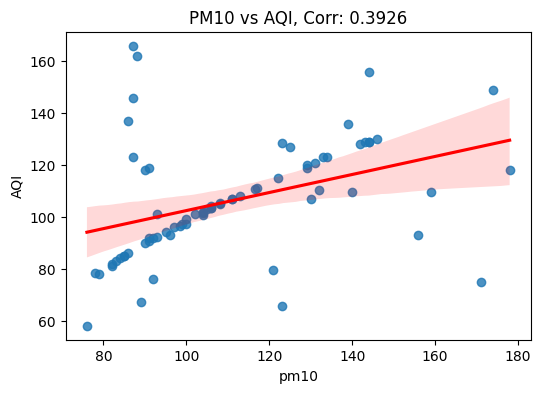

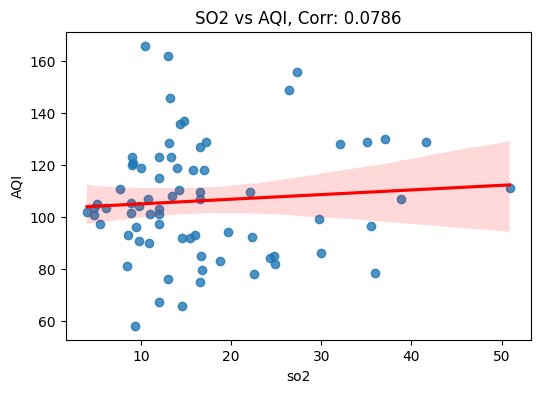

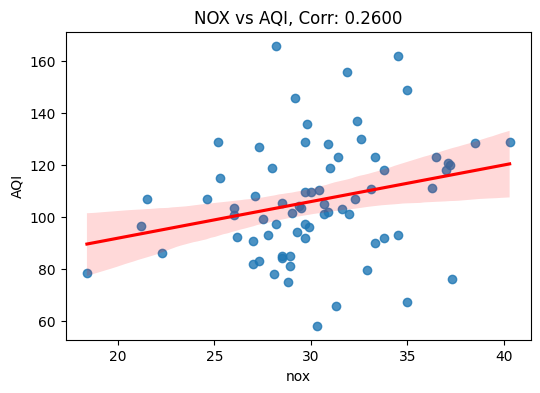

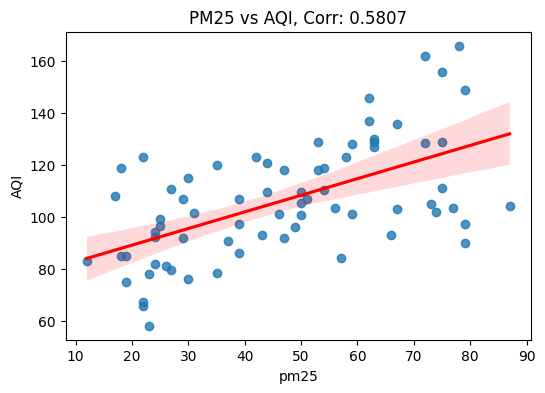

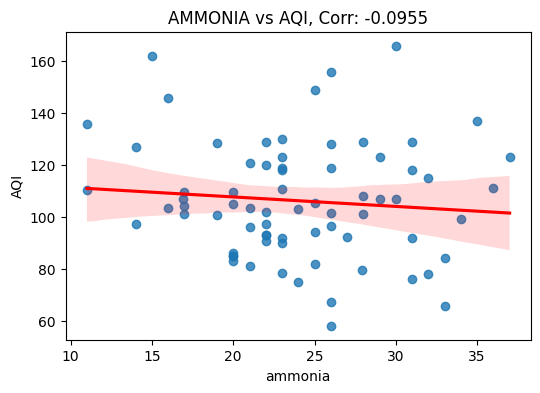

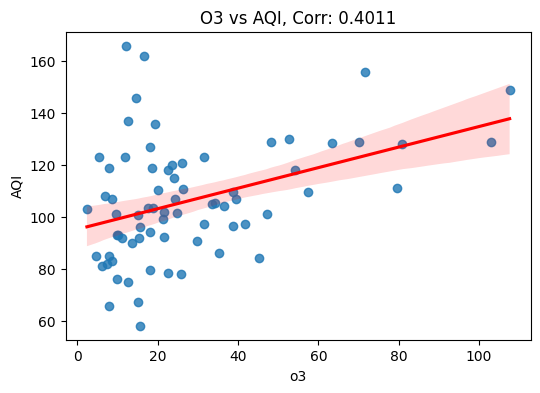

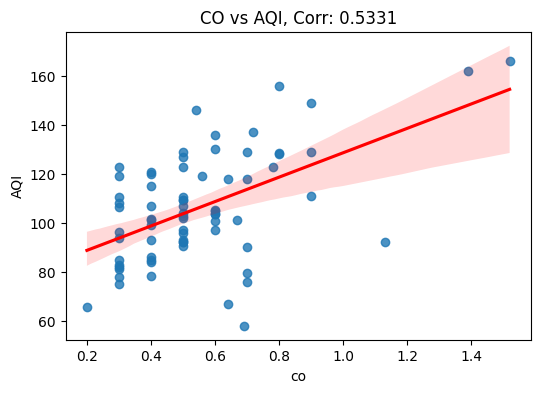

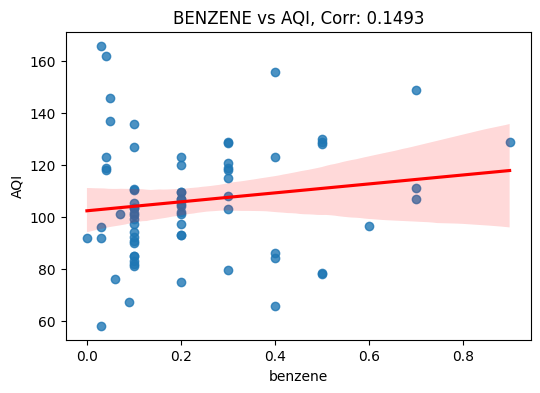

In [54]:
# Correlation with AQI
for col in numeric_features[:-1]:
    fig = plt.figure(figsize =(6, 4))
    sns.regplot(clean_data, x = col, y = 'AQI', line_kws = {'color':'red'})
    plt.title(f"{col.upper()} vs AQI, Corr: {clean_data['AQI'].corr(clean_data[col]):.4f}")
    plt.show()

### **Summary of the insights:**
• PM 10: Moderate positive correlation (0.3926) with AQI. Higher levels contribute to poorer air quality.

• SO2: Weak positive correlation (0.0786) with AQI. Limited impact on air quality.

• NOx: Moderate positive correlation (0.2600) with AQI. Higher levels indicate poorer air quality.

• PM 2.5: **Strong positive correlation (0.5807)** with AQI. Higher concentrations result in increased AQI values and potential health risks.

• Ammonia: Weak negative correlation (-0.0955) with AQI. Limited association with air quality.

• O3: Moderate positive correlation (0.4011) with AQI. Higher levels contribute to increased AQI values and potentially poorer air quality.

• CO: **Moderate positive correlation (0.5331)** with AQI. Elevated concentrations indicate poorer air quality.

• Benzene: Weak positive correlation (0.1493) with AQI. Limited impact, but can contribute to higher AQI values.

These concise insights highlight the correlations between pollutants and AQI, **emphasizing the significant impact of PM 2.5 and CO**, while noting the limited influence of SO2, ammonia, and benzene on overall air quality.

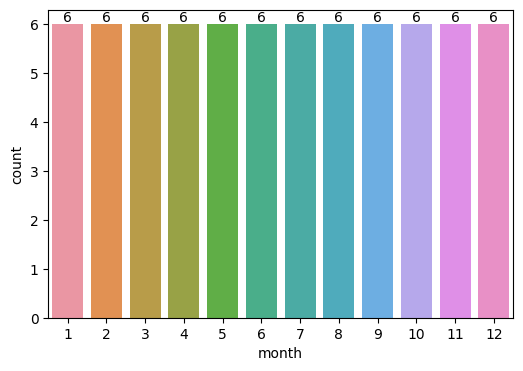

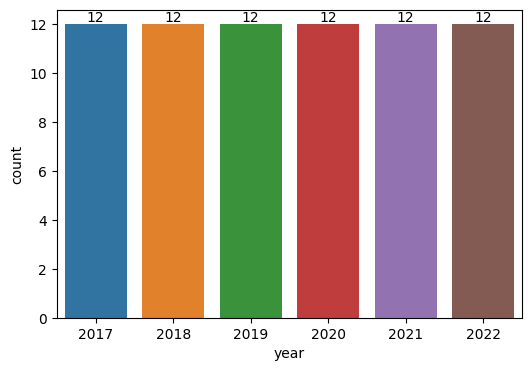

In [55]:
# Categorical features analysis
for col in categorical_features:
    fig = plt.figure(figsize = (6, 4))
    ax = sns.countplot(clean_data, x = col)
    ax.bar_label(ax.containers[0])
    plt.show()

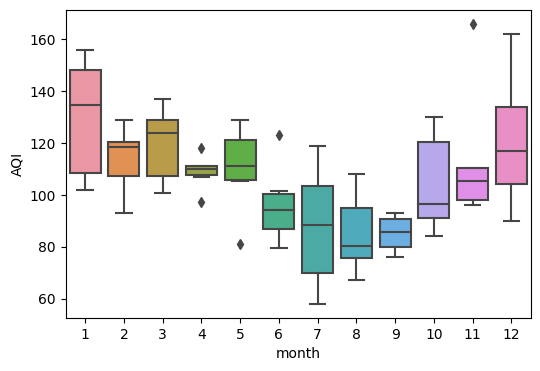

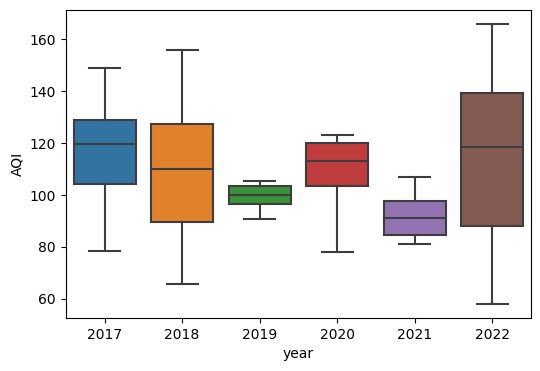

In [56]:
for col in categorical_features:
    fig = plt.figure(figsize = (6, 4))
    ax = sns.boxplot(clean_data, x = col, y = 'AQI')
    plt.show()

### **Insights**
• AQI is higher at the beginning and end of the year, indicating poorer air quality during those periods. It is lower from June to September, suggesting better air quality.

• There is no significant difference in AQI across different years, except for a large variance observed during 2022, indicating potential fluctuations in air pollution levels.

## **0.5 Analysis of Air Pollutants and Air Quality Index (AQI) over Time**

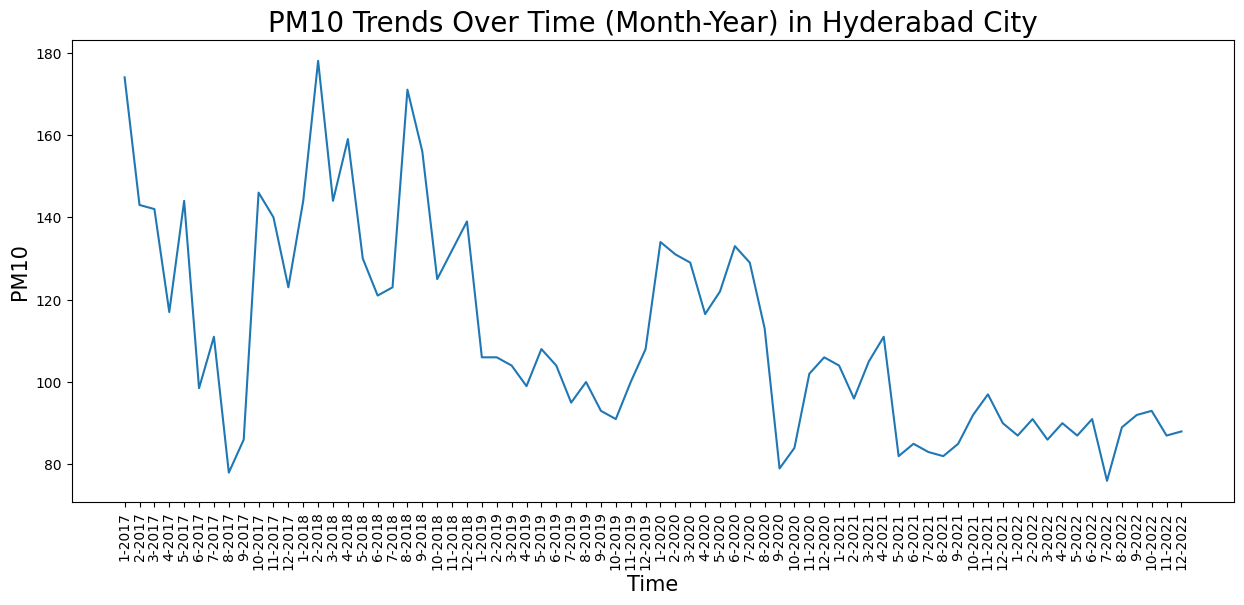

In [57]:
fig = plt.figure(figsize = (15, 6))
sns.lineplot(x = (clean_data['month'].astype(str) + '-' +
                  clean_data['year'].astype(str)), y = clean_data['pm10'])
plt.xticks(rotation = 90)
plt.title("PM10 Trends Over Time (Month-Year) in Hyderabad City", size = 20)
plt.xlabel("Time", size = 15)
plt.ylabel("PM10", size = 15)
plt.show()

### **Insights**

• PM10 levels in Hyderabad City have consistently decreased since 2018, indicating improved air quality.

• This suggests the effectiveness of pollution control measures and initiatives implemented in the city.

• Sustaining this trend is crucial for maintaining and further improving air quality in Hyder-abad.

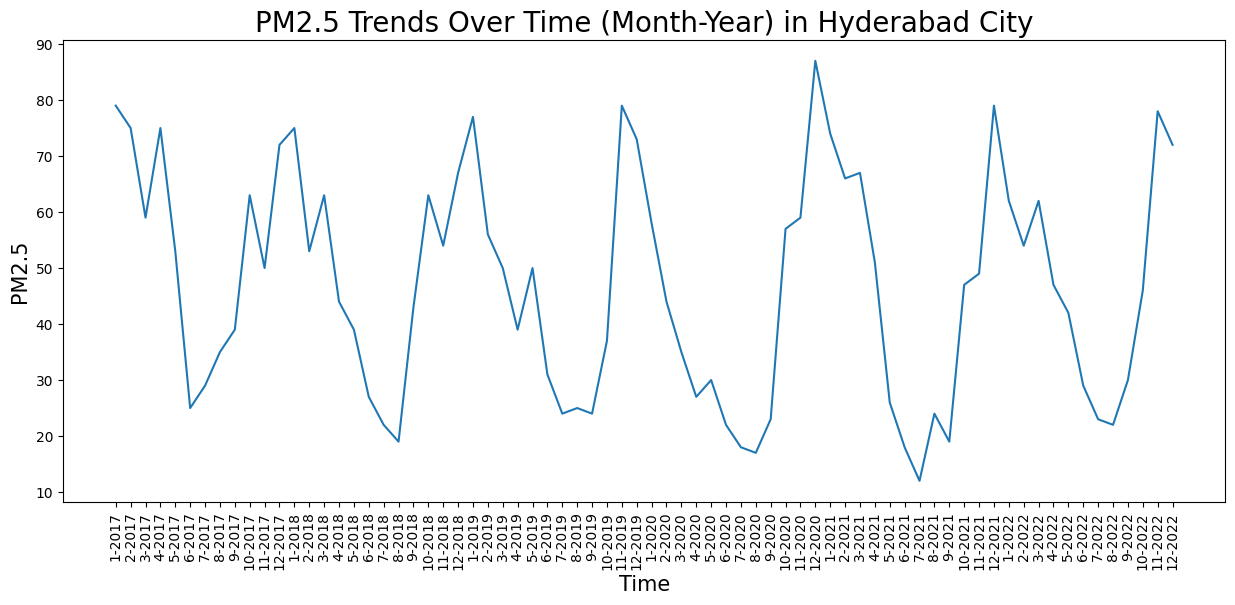

In [58]:
fig = plt.figure(figsize = (15, 6))
sns.lineplot(x = (clean_data['month'].astype(str) + '-' +
                  clean_data['year'].astype(str)), y = clean_data['pm25'])
plt.xticks(rotation = 90)
plt.title("PM2.5 Trends Over Time (Month-Year) in Hyderabad City", size = 20)
plt.xlabel("Time", size = 15)
plt.ylabel("PM2.5",size = 15)
plt.show()

### **Insights**

• PM2.5 follows a cyclical pattern, with lower levels in August and higher levels in December.

• This suggests seasonal variations in PM2.5 concentrations, indicating potentially better air quality in August and poorer air quality in December.

• Understanding and addressing these patterns can help implement targeted strategies to mit-igate the impact of elevated PM2.5 levels during peak months.

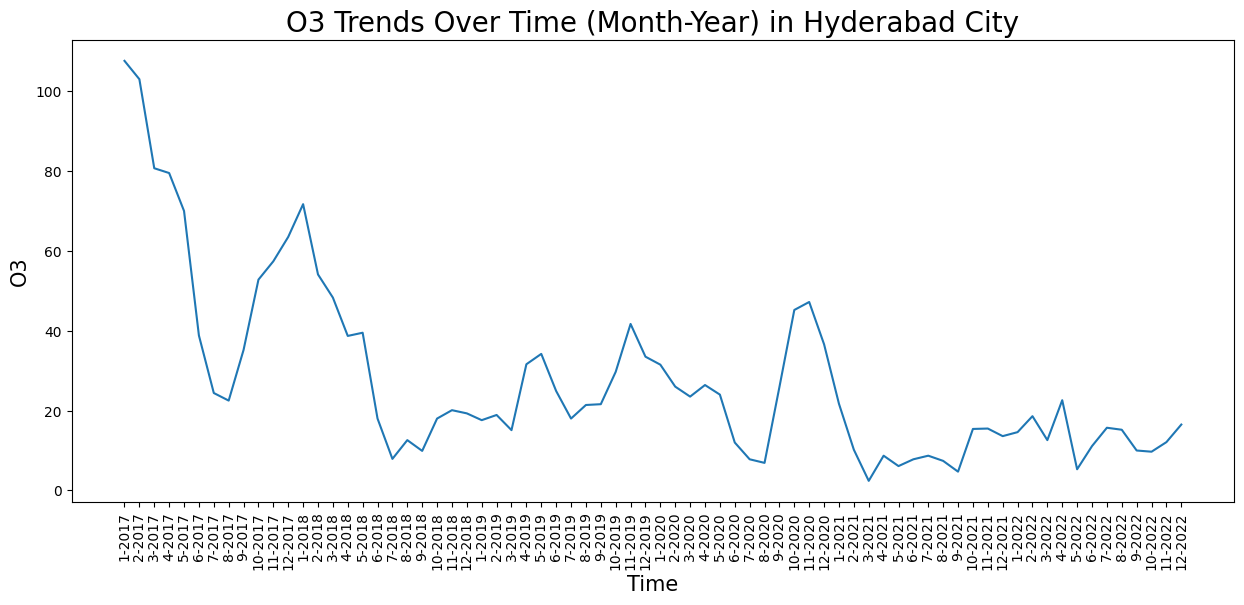

In [59]:
fig = plt.figure(figsize = (15, 6))
sns.lineplot(x = (clean_data['month'].astype(str) + '-' +
                  clean_data['year'].astype(str)), y = clean_data['o3'])
plt.xticks(rotation = 90)
plt.title("O3 Trends Over Time (Month-Year) in Hyderabad City", size = 20)
plt.xlabel("Time", size = 15)
plt.ylabel("O3",size = 15)
plt.show()

### **Insights**

• O3 levels in Hyderabad City have consistently decreased since 2017, indicating improved air quality.

• This reflects successful efforts to reduce ozone pollution in the city.

• Sustaining this trend is crucial for further enhancing air quality in Hyderabad.

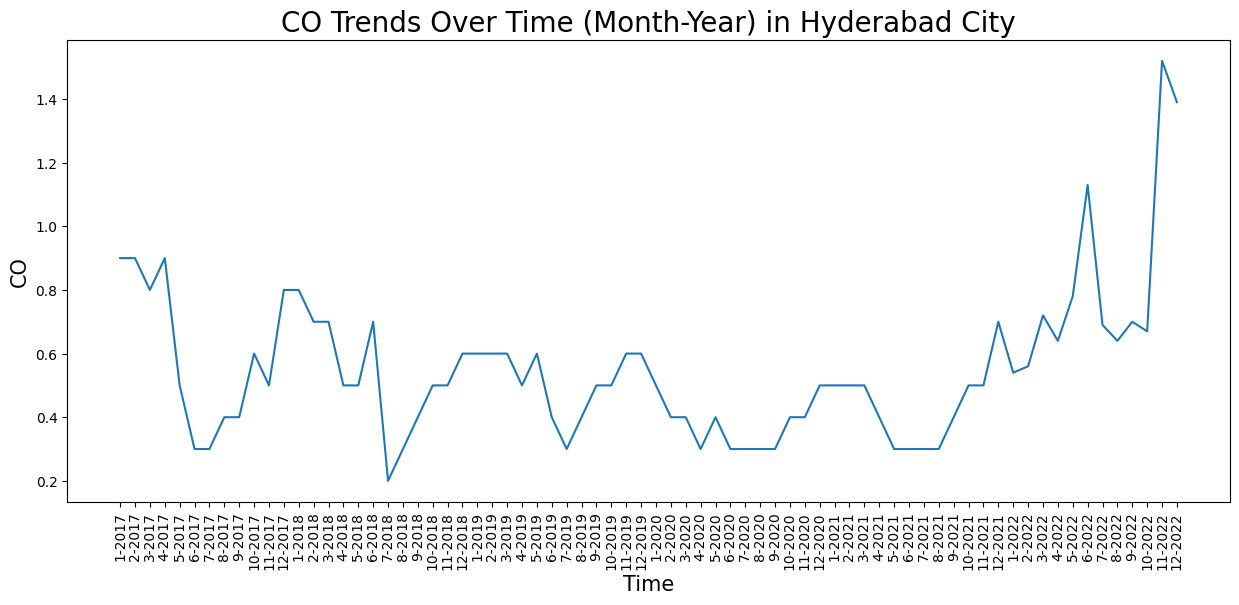

In [60]:
fig = plt.figure(figsize = (15, 6))
sns.lineplot(x = (clean_data['month'].astype(str) + '-' +
                  clean_data['year'].astype(str)), y = clean_data['co'])
plt.xticks(rotation = 90)
plt.title("CO Trends Over Time (Month-Year) in Hyderabad City", size = 20)
plt.xlabel("Time", size = 15)
plt.ylabel("CO",size = 15)
plt.show()

### **Insights**

• CO levels have increased significantly over time, rising from 0.3 mg/m3 in July 2021 to approximately 1.5 mg/m3, around five times higher.

• This upward trend indicates a concerning deterioration in air quality, highlighting the need to address sources of CO emissions effectively.

• Identifying the factors contributing to this CO increase is crucial for implementing targeted measures to control and reduce pollution levels.

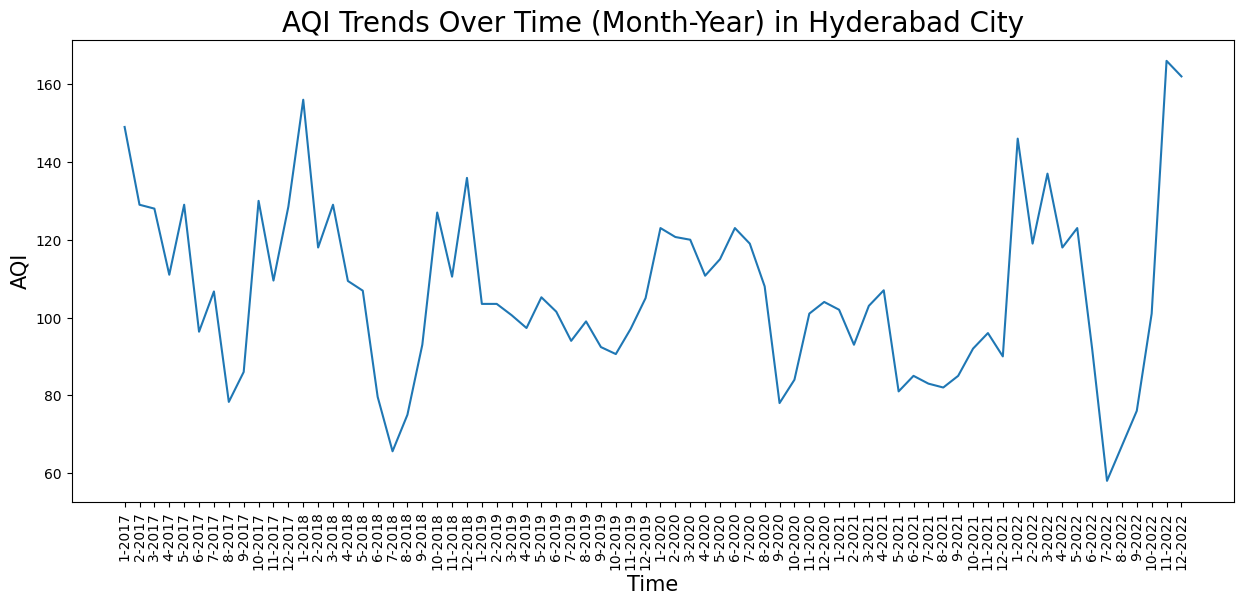

In [61]:
fig = plt.figure(figsize = (15, 6))
sns.lineplot(x = (clean_data['month'].astype(str) + '-' +
                  clean_data['year'].astype(str)), y = clean_data['AQI'])
plt.xticks(rotation = 90)
plt.title("AQI Trends Over Time (Month-Year) in Hyderabad City", size = 20)
plt.xlabel("Time", size = 15)
plt.ylabel("AQI",size = 15)
plt.show()

### **Insights**

• AQI has been improving since 2017, indicating better air quality over time.

• However, in July 2022, there was a sudden increase, reaching the highest level since 2017.

• This increase in AQI was due to higher CO levels and elevated PM2.5 concentrations during the last months of 2022.

• Identifying and addressing the factors behind the increase in CO and PM2.5 levels is crucial for maintaining and improving air quality.

## **0.6 Conclusion**
The analysis of air quality in Hyderabad City reveals both improvements and areas of concern. While PM10, PM2.5, and CO levels indicate potential health risks and the need for continued efforts to reduce pollution, the decreasing trends in PM10 and O3 demonstrate successful initia-tives. To sustain and further enhance air quality, it is crucial to address the sources of high CO levels, mitigate PM2.5 concentrations during peak months, and maintain effective pollution control measures. Targeted strategies, coupled with ongoing monitoring and evaluation, can contribute to a healthier environment for the residents of Hyderabad.